In [31]:
# 1. Các thư viện cần thiết
!pip3 install -U git+https://github.com/PYFTS/pyFTS
import pandas as pd
import numpy as np
from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.models import chen
from pyFTS.common import FLR
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Fix the import in the pyFTS library if necessary
# In the file '/usr/local/lib/python3.10/dist-packages/pyFTS/common/transformations/trend.py', change:
# from pandas import datetime
# to:
# from pandas import Timestamp

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-pz7nb3fa
  Running command git clone --filter=blob:none --quiet https://github.com/PYFTS/pyFTS /tmp/pip-req-build-pz7nb3fa
  Resolved https://github.com/PYFTS/pyFTS to commit 4e0ee7cdd9fc9a8ac9170c0c3496536ef0378cb7
  Preparing metadata (setup.py) ... done


# **Chia train test theo tỉ lệ 8:2**

In [32]:
# 2. Đọc file csv và lấy  giá Close
df = pd.read_csv('Btc.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close'].values

In [33]:
# 3. Chia train, test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

/usr/local/lib/python3.10/dist-packages/pyFTS/partitioners/partitioner.py:278: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(ticks)


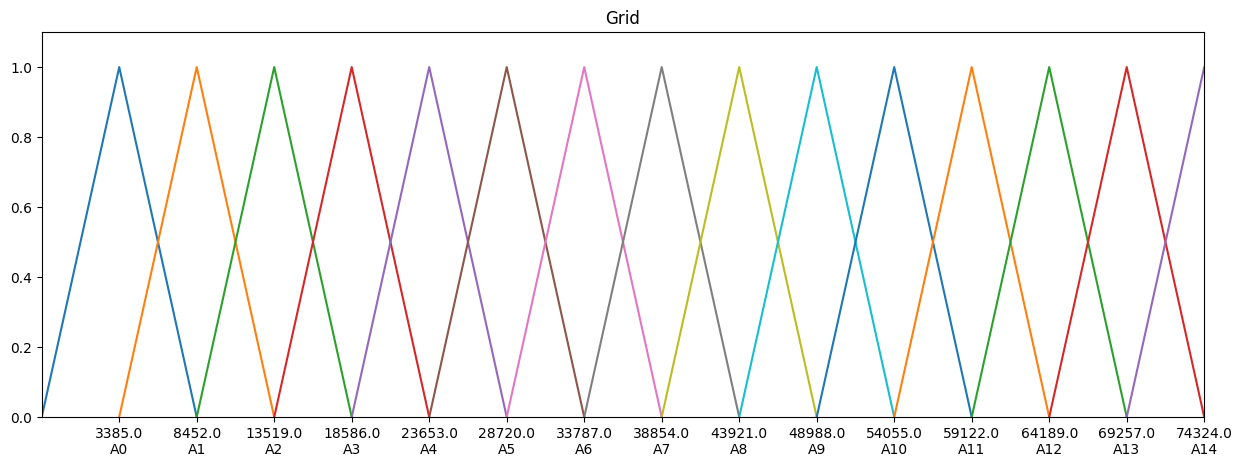

In [34]:
# 4. Xây dựng phân vùng mờ (Grid Partitioner)
partitioner = Grid.GridPartitioner(data=train_data, npart=15)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
partitioner.plot(ax)

In [35]:
# 5. Fuzzyfy dữ liệu huấn luyện (Chuyển đổi dữ liệu huấn luyện thành các giá trị mờ)
fuzzyfied = partitioner.fuzzyfy(train_data)

In [36]:
# 6. Tạo các mối quan hệ logic giữa các  mờ (FLR)
patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)
print([str(k) for k in patterns])

['A0 -> A0', 'A0 -> A1', 'A1 -> A0', 'A1 -> A1', 'A0 -> A2', 'A1 -> A2', 'A2 -> A1', 'A2 -> A2', 'A2 -> A0', 'A1 -> A3', 'A2 -> A3', 'A3 -> A1', 'A3 -> A2', 'A3 -> A3', 'A2 -> A4', 'A3 -> A4', 'A4 -> A3', 'A4 -> A4', 'A4 -> A2', 'A3 -> A5', 'A4 -> A5', 'A5 -> A3', 'A5 -> A4', 'A5 -> A5', 'A4 -> A6', 'A5 -> A6', 'A6 -> A5', 'A6 -> A6', 'A5 -> A7', 'A6 -> A7', 'A7 -> A6', 'A7 -> A7', 'A6 -> A8', 'A7 -> A8', 'A8 -> A7', 'A8 -> A8', 'A8 -> A6', 'A7 -> A5', 'A7 -> A9', 'A8 -> A9', 'A9 -> A8', 'A9 -> A9', 'A8 -> A10', 'A9 -> A10', 'A10 -> A9', 'A10 -> A10', 'A9 -> A11', 'A10 -> A11', 'A11 -> A10', 'A11 -> A11', 'A10 -> A8', 'A11 -> A8', 'A11 -> A9', 'A10 -> A12', 'A11 -> A12', 'A12 -> A11', 'A12 -> A12', 'A12 -> A10', 'A9 -> A7', 'A11 -> A13', 'A12 -> A13', 'A13 -> A12', 'A13 -> A13', 'A13 -> A11', 'A6 -> A4']


In [37]:
# 7. Xây dựng mô hình FTS
model = hofts.HighOrderFTS(order=2, partitioner=partitioner)
model.fit(train_data)
print(model)

High Order FTS:
A0,A0 -> A0,A1,A2
A0,A1 -> A0,A1,A2
A1,A0 -> A0,A1,A2
A2,A0 -> A0,A1,A2
A1,A1 -> A0,A1,A2,A3
A0,A2 -> A1,A2
A1,A2 -> A0,A1,A2,A3
A2,A1 -> A0,A1,A2,A3
A3,A1 -> A1,A2
A1,A3 -> A1,A2,A3
A2,A2 -> A0,A1,A2,A3,A4
A2,A3 -> A1,A2,A3,A4
A3,A2 -> A1,A2,A3,A4
A4,A2 -> A2,A3,A4
A3,A3 -> A2,A3,A4,A5
A2,A4 -> A3,A4
A3,A4 -> A2,A3,A4,A5
A4,A3 -> A2,A3,A4,A5
A4,A4 -> A2,A3,A4,A5,A6
A3,A5 -> A3,A4,A5
A5,A3 -> A3,A4,A5
A4,A5 -> A3,A4,A5,A6
A5,A4 -> A3,A4,A5,A6
A5,A5 -> A3,A4,A5,A6,A7
A6,A4 -> A4,A5,A6
A4,A6 -> A5,A6
A5,A6 -> A4,A5,A6,A7
A6,A5 -> A4,A5,A6,A7
A7,A5 -> A5,A6,A7
A6,A6 -> A4,A5,A6,A7,A8
A5,A7 -> A5,A6,A7
A7,A6 -> A5,A6,A7,A8
A8,A6 -> A6,A7,A8
A6,A7 -> A5,A6,A7,A8,A9
A7,A7 -> A5,A6,A7,A8,A9
A6,A8 -> A6,A7,A8,A9
A7,A8 -> A6,A7,A8,A9
A8,A7 -> A6,A7,A8,A9
A9,A7 -> A7,A8,A9
A8,A8 -> A10,A6,A7,A8,A9
A7,A9 -> A7,A8,A9
A8,A9 -> A10,A7,A8,A9
A9,A8 -> A10,A7,A8,A9
A8,A10 -> A10,A8,A9
A10,A8 -> A10,A8,A9
A9,A9 -> A10,A11,A7,A8,A9
A9,A10 -> A10,A11,A8,A9
A10,A9 -> A10,A11,A8,A9
A11,A8 ->

In [38]:
# 8. Dự đoán dữ liệu test
train_predict = model.predict(train_data)
y_pred_test = model.predict(test_data)

# Điều chỉnh độ dài để dự đoán
min_length = min(len(y_pred_test), len(test_data))
y_pred_test = y_pred_test[:min_length]
test_data = test_data[:min_length]

In [39]:
# 10. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, test_data)
test_mape = mean_absolute_percentage_error(y_pred_test, test_data)
test_rmse = np.sqrt(mean_squared_error(y_pred_test, test_data))
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 1369.726011068633
Testing RMSE: 1794.9589768556564
Testing MAPE: 0.03252389679703474


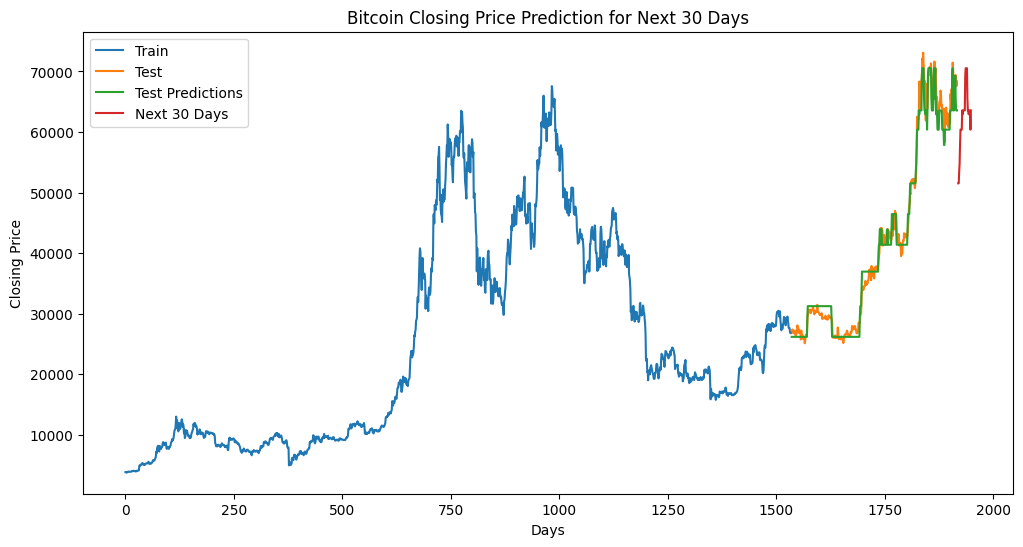

Predicted closing prices for the next 30 days:
[51521.97573793 51521.97573793 53422.10367168 54688.85562752
 57855.73551711 60389.23942879 60389.23942879 60389.23942879
 60389.23942879 63556.11931838 62922.74334046 63556.11931838
 63556.11931838 63556.11931838 63556.11931838 63556.11931838
 69256.50311965 70523.25507549 70523.25507549 70523.25507549
 70523.25507549 65456.24725214 63556.11931838 63556.11931838
 62922.74334046 63556.11931838 63556.11931838 62922.74334046
 60389.23942879 63556.11931838]


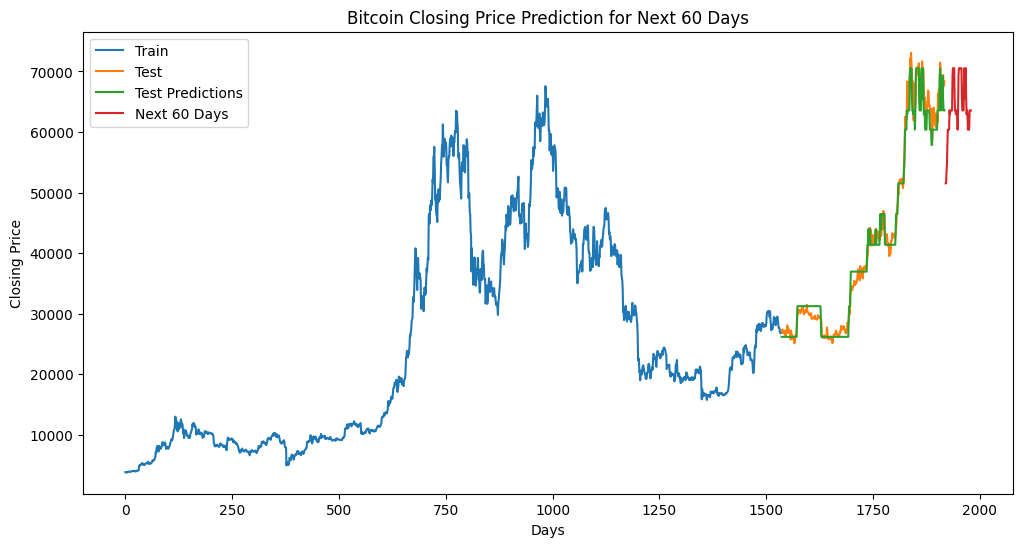

Predicted closing prices for the next 60 days:
[51521.97573793 51521.97573793 53422.10367168 54688.85562752
 57855.73551711 60389.23942879 60389.23942879 60389.23942879
 60389.23942879 63556.11931838 62922.74334046 63556.11931838
 63556.11931838 63556.11931838 63556.11931838 63556.11931838
 69256.50311965 70523.25507549 70523.25507549 70523.25507549
 70523.25507549 65456.24725214 63556.11931838 63556.11931838
 62922.74334046 63556.11931838 63556.11931838 62922.74334046
 60389.23942879 63556.11931838 69256.50311965 70523.25507549
 70523.25507549 70523.25507549 70523.25507549 70523.25507549
 70523.25507549 70523.25507549 65456.24725214 63556.11931838
 63556.11931838 63556.11931838 63556.11931838 69256.50311965
 70523.25507549 65456.24725214 69256.50311965 70523.25507549
 65456.24725214 62922.74334046 63556.11931838 62922.74334046
 60389.23942879 60389.23942879 60389.23942879 60389.23942879
 63556.11931838 63556.11931838 63556.11931838 63556.11931838]


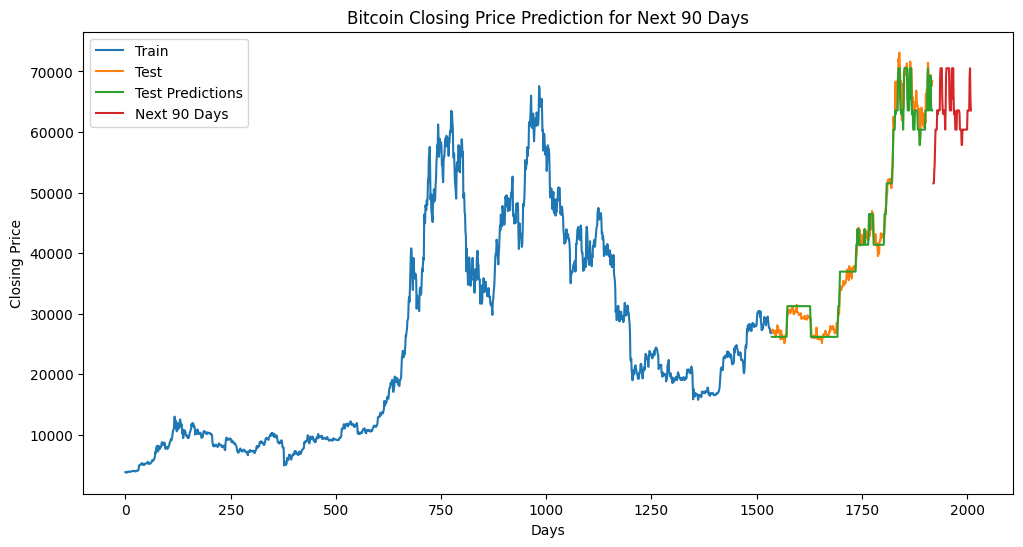

Predicted closing prices for the next 90 days:
[51521.97573793 51521.97573793 53422.10367168 54688.85562752
 57855.73551711 60389.23942879 60389.23942879 60389.23942879
 60389.23942879 63556.11931838 62922.74334046 63556.11931838
 63556.11931838 63556.11931838 63556.11931838 63556.11931838
 69256.50311965 70523.25507549 70523.25507549 70523.25507549
 70523.25507549 65456.24725214 63556.11931838 63556.11931838
 62922.74334046 63556.11931838 63556.11931838 62922.74334046
 60389.23942879 63556.11931838 69256.50311965 70523.25507549
 70523.25507549 70523.25507549 70523.25507549 70523.25507549
 70523.25507549 70523.25507549 65456.24725214 63556.11931838
 63556.11931838 63556.11931838 63556.11931838 69256.50311965
 70523.25507549 65456.24725214 69256.50311965 70523.25507549
 65456.24725214 62922.74334046 63556.11931838 62922.74334046
 60389.23942879 60389.23942879 60389.23942879 60389.23942879
 63556.11931838 63556.11931838 63556.11931838 63556.11931838
 63556.11931838 63556.11931838 62922.7

In [40]:
# 10. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[-time_step:])
    lst_output = []

    for _ in range(days):
        x_input = np.array(temp_input[-time_step:])  # Lấy 100 dữ liệu lịch sử
        yhat = model.predict(x_input)[0]  # Dự đoán dữ liệu tiếp theo
        temp_input.append(yhat)
        lst_output.append(yhat)

    return np.array(lst_output)

last_100_days = df1[-100:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, 100, days)

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), train_data, label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Test')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())


# **Chia train test theo tỉ lệ 7:3**

In [41]:
# 2. Đọc file csv và lấy  giá Close
df = pd.read_csv('Btc.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close'].values

In [42]:
# 3. Chia train, test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

/usr/local/lib/python3.10/dist-packages/pyFTS/partitioners/partitioner.py:278: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(ticks)


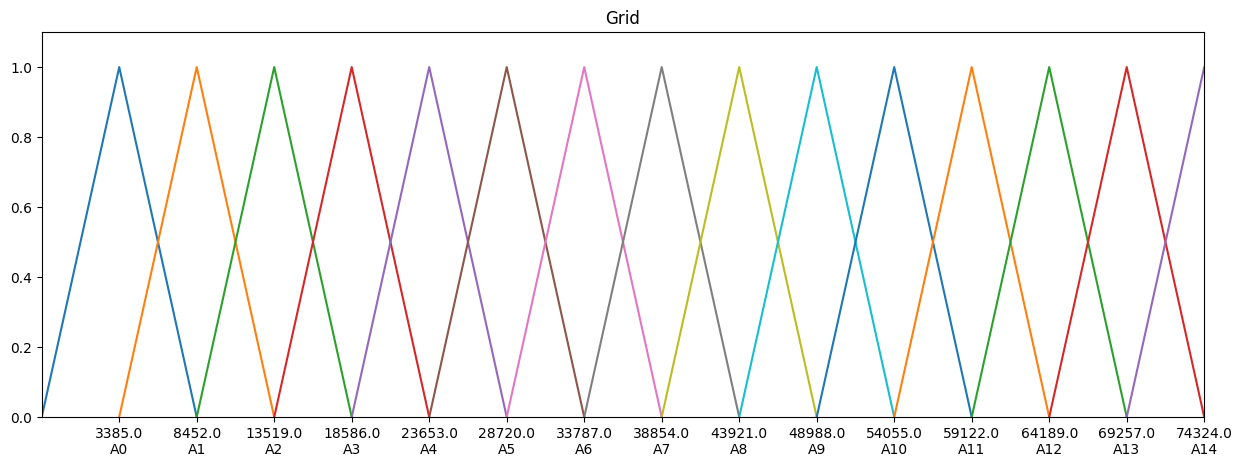

In [43]:
# 4. Xây dựng phân vùng mờ (Grid Partitioner)
partitioner = Grid.GridPartitioner(data=train_data, npart=15)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
partitioner.plot(ax)

In [44]:
# 5. Fuzzyfy dữ liệu huấn luyện (Chuyển đổi dữ liệu huấn luyện thành các giá trị mờ)
fuzzyfied = partitioner.fuzzyfy(train_data)

In [45]:
# 6. Tạo các mối quan hệ logic giữa các  mờ (FLR)
patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)
print([str(k) for k in patterns])

['A0 -> A0', 'A0 -> A1', 'A1 -> A0', 'A1 -> A1', 'A0 -> A2', 'A1 -> A2', 'A2 -> A1', 'A2 -> A2', 'A2 -> A0', 'A1 -> A3', 'A2 -> A3', 'A3 -> A1', 'A3 -> A2', 'A3 -> A3', 'A2 -> A4', 'A3 -> A4', 'A4 -> A3', 'A4 -> A4', 'A4 -> A2', 'A3 -> A5', 'A4 -> A5', 'A5 -> A3', 'A5 -> A4', 'A5 -> A5', 'A4 -> A6', 'A5 -> A6', 'A6 -> A5', 'A6 -> A6', 'A5 -> A7', 'A6 -> A7', 'A7 -> A6', 'A7 -> A7', 'A6 -> A8', 'A7 -> A8', 'A8 -> A7', 'A8 -> A8', 'A8 -> A6', 'A7 -> A5', 'A7 -> A9', 'A8 -> A9', 'A9 -> A8', 'A9 -> A9', 'A8 -> A10', 'A9 -> A10', 'A10 -> A9', 'A10 -> A10', 'A9 -> A11', 'A10 -> A11', 'A11 -> A10', 'A11 -> A11', 'A10 -> A8', 'A11 -> A8', 'A11 -> A9', 'A10 -> A12', 'A11 -> A12', 'A12 -> A11', 'A12 -> A12', 'A12 -> A10', 'A9 -> A7', 'A11 -> A13', 'A12 -> A13', 'A13 -> A12', 'A13 -> A13', 'A13 -> A11', 'A6 -> A4']


In [46]:
# 7. Xây dựng mô hình FTS
model = hofts.HighOrderFTS(order=2, partitioner=partitioner)
model.fit(train_data)
print(model)

High Order FTS:
A0,A0 -> A0,A1,A2
A0,A1 -> A0,A1,A2
A1,A0 -> A0,A1,A2
A2,A0 -> A0,A1,A2
A1,A1 -> A0,A1,A2,A3
A0,A2 -> A1,A2
A1,A2 -> A0,A1,A2,A3
A2,A1 -> A0,A1,A2,A3
A3,A1 -> A1,A2
A1,A3 -> A1,A2,A3
A2,A2 -> A0,A1,A2,A3,A4
A2,A3 -> A1,A2,A3,A4
A3,A2 -> A1,A2,A3,A4
A4,A2 -> A2,A3,A4
A3,A3 -> A2,A3,A4,A5
A2,A4 -> A3,A4
A3,A4 -> A2,A3,A4,A5
A4,A3 -> A2,A3,A4,A5
A4,A4 -> A2,A3,A4,A5,A6
A3,A5 -> A3,A4,A5
A5,A3 -> A3,A4,A5
A4,A5 -> A3,A4,A5,A6
A5,A4 -> A3,A4,A5,A6
A5,A5 -> A3,A4,A5,A6,A7
A6,A4 -> A4,A5,A6
A4,A6 -> A5,A6
A5,A6 -> A4,A5,A6,A7
A6,A5 -> A4,A5,A6,A7
A7,A5 -> A5,A6,A7
A6,A6 -> A4,A5,A6,A7,A8
A5,A7 -> A5,A6,A7
A7,A6 -> A5,A6,A7,A8
A8,A6 -> A6,A7,A8
A6,A7 -> A5,A6,A7,A8,A9
A7,A7 -> A5,A6,A7,A8,A9
A6,A8 -> A6,A7,A8,A9
A7,A8 -> A6,A7,A8,A9
A8,A7 -> A6,A7,A8,A9
A9,A7 -> A7,A8,A9
A8,A8 -> A10,A6,A7,A8,A9
A7,A9 -> A7,A8,A9
A8,A9 -> A10,A7,A8,A9
A9,A8 -> A10,A7,A8,A9
A8,A10 -> A10,A8,A9
A10,A8 -> A10,A8,A9
A9,A9 -> A10,A11,A7,A8,A9
A9,A10 -> A10,A11,A8,A9
A10,A9 -> A10,A11,A8,A9
A11,A8 ->

In [47]:
# 8. Dự đoán dữ liệu test
train_predict = model.predict(train_data)
y_pred_test = model.predict(test_data)

# Điều chỉnh độ dài để dự đoán
min_length = min(len(y_pred_test), len(test_data))
y_pred_test = y_pred_test[:min_length]
test_data = test_data[:min_length]

In [48]:
# 9. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, test_data)
test_mape = mean_absolute_percentage_error(y_pred_test, test_data)
test_rmse = np.sqrt(mean_squared_error(y_pred_test, test_data))
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 1226.5098887188028
Testing RMSE: 1613.4039940377277
Testing MAPE: 0.03498145278155925


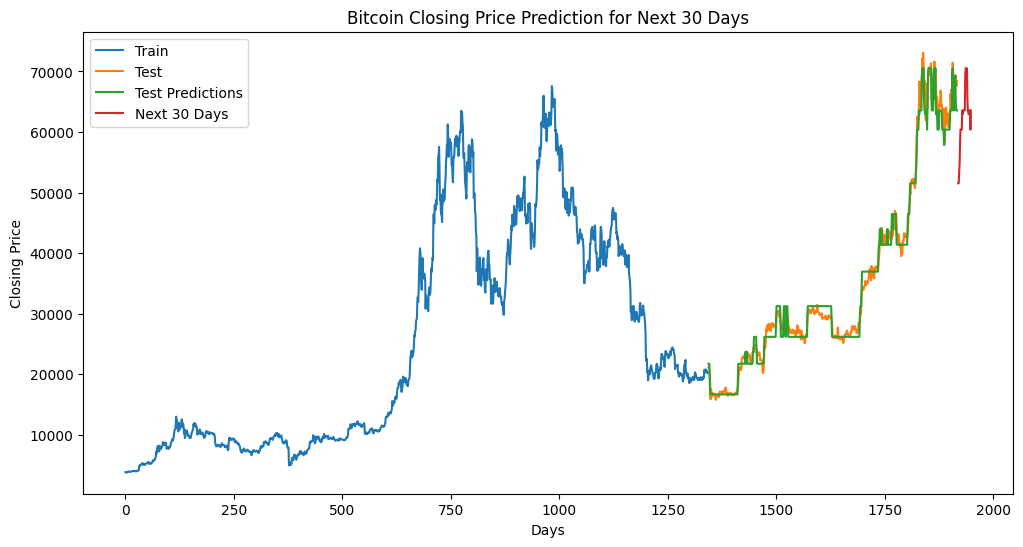

Predicted closing prices for the next 30 days:
[51521.97573793 51521.97573793 53422.10367168 54688.85562752
 57855.73551711 60389.23942879 60389.23942879 60389.23942879
 60389.23942879 63556.11931838 62922.74334046 63556.11931838
 63556.11931838 63556.11931838 63556.11931838 63556.11931838
 69256.50311965 70523.25507549 70523.25507549 70523.25507549
 70523.25507549 65456.24725214 63556.11931838 63556.11931838
 62922.74334046 63556.11931838 63556.11931838 62922.74334046
 60389.23942879 63556.11931838]


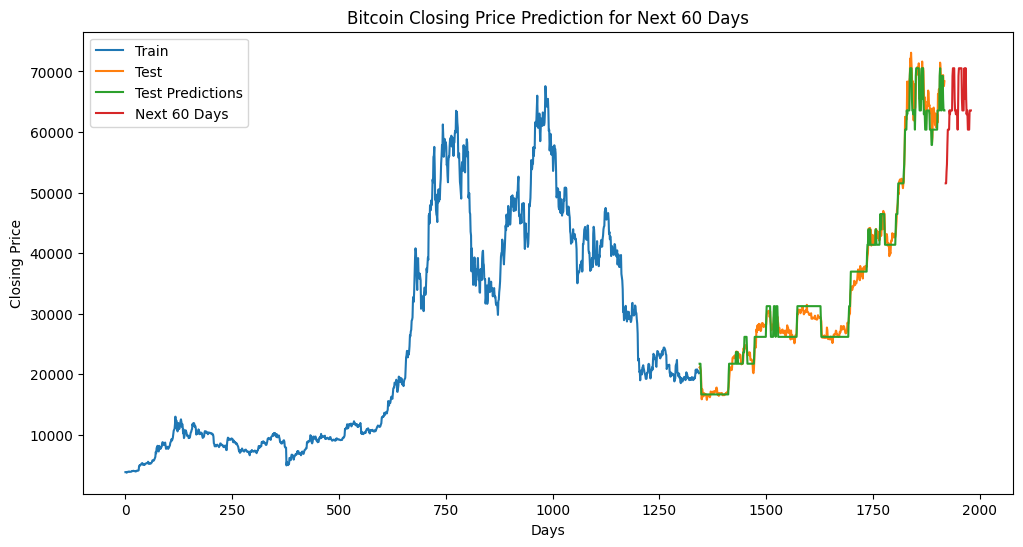

Predicted closing prices for the next 60 days:
[51521.97573793 51521.97573793 53422.10367168 54688.85562752
 57855.73551711 60389.23942879 60389.23942879 60389.23942879
 60389.23942879 63556.11931838 62922.74334046 63556.11931838
 63556.11931838 63556.11931838 63556.11931838 63556.11931838
 69256.50311965 70523.25507549 70523.25507549 70523.25507549
 70523.25507549 65456.24725214 63556.11931838 63556.11931838
 62922.74334046 63556.11931838 63556.11931838 62922.74334046
 60389.23942879 63556.11931838 69256.50311965 70523.25507549
 70523.25507549 70523.25507549 70523.25507549 70523.25507549
 70523.25507549 70523.25507549 65456.24725214 63556.11931838
 63556.11931838 63556.11931838 63556.11931838 69256.50311965
 70523.25507549 65456.24725214 69256.50311965 70523.25507549
 65456.24725214 62922.74334046 63556.11931838 62922.74334046
 60389.23942879 60389.23942879 60389.23942879 60389.23942879
 63556.11931838 63556.11931838 63556.11931838 63556.11931838]


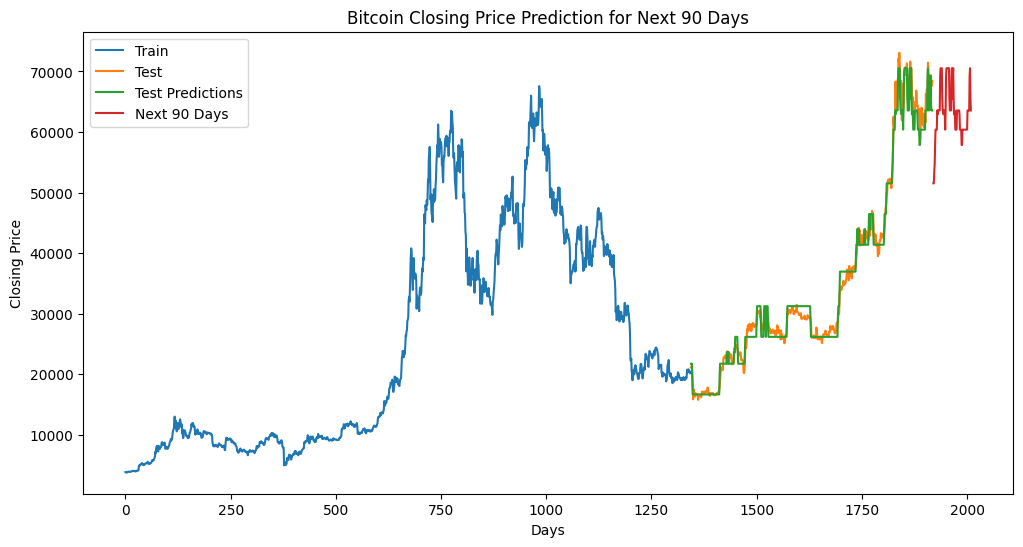

Predicted closing prices for the next 90 days:
[51521.97573793 51521.97573793 53422.10367168 54688.85562752
 57855.73551711 60389.23942879 60389.23942879 60389.23942879
 60389.23942879 63556.11931838 62922.74334046 63556.11931838
 63556.11931838 63556.11931838 63556.11931838 63556.11931838
 69256.50311965 70523.25507549 70523.25507549 70523.25507549
 70523.25507549 65456.24725214 63556.11931838 63556.11931838
 62922.74334046 63556.11931838 63556.11931838 62922.74334046
 60389.23942879 63556.11931838 69256.50311965 70523.25507549
 70523.25507549 70523.25507549 70523.25507549 70523.25507549
 70523.25507549 70523.25507549 65456.24725214 63556.11931838
 63556.11931838 63556.11931838 63556.11931838 69256.50311965
 70523.25507549 65456.24725214 69256.50311965 70523.25507549
 65456.24725214 62922.74334046 63556.11931838 62922.74334046
 60389.23942879 60389.23942879 60389.23942879 60389.23942879
 63556.11931838 63556.11931838 63556.11931838 63556.11931838
 63556.11931838 63556.11931838 62922.7

In [49]:
# 10. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[-time_step:])
    lst_output = []

    for _ in range(days):
        x_input = np.array(temp_input[-time_step:])  # Lấy 100 dữ liệu lịch sử
        yhat = model.predict(x_input)[0]  # Dự đoán dữ liệu tiếp theo
        temp_input.append(yhat)
        lst_output.append(yhat)

    return np.array(lst_output)

last_100_days = df1[-100:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, 100, days)

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), train_data, label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Test')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())

# **Chia train test theo tỉ lệ 6:4**

In [50]:
# 2. Đọc file csv và lấy  giá Close
df = pd.read_csv('Btc.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df1 = df['Close'].values

In [51]:
# 3. Chia train, test
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

/usr/local/lib/python3.10/dist-packages/pyFTS/partitioners/partitioner.py:278: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(ticks)


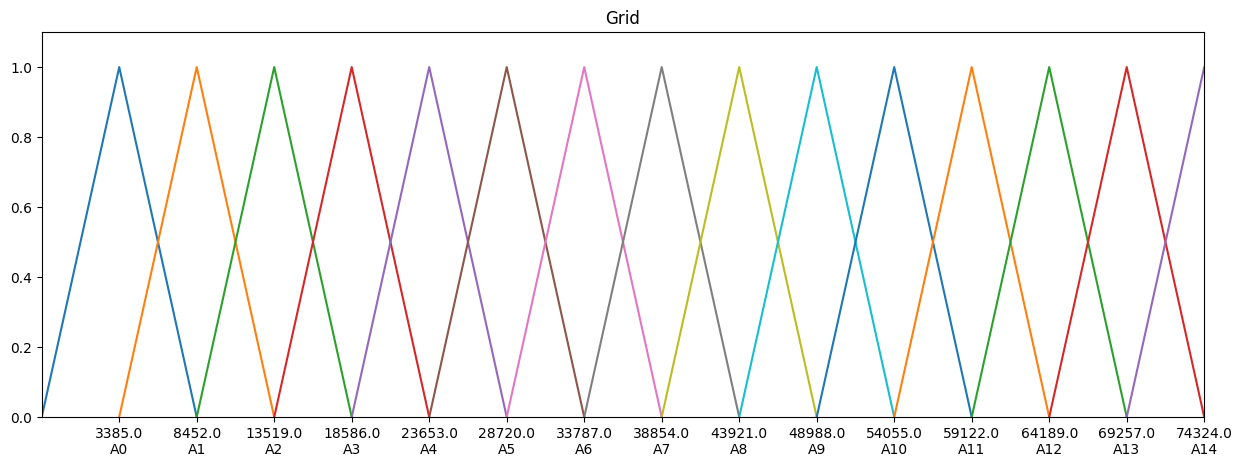

In [52]:
# 4. Xây dựng phân vùng mờ (Grid Partitioner)
partitioner = Grid.GridPartitioner(data=train_data, npart=15)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
partitioner.plot(ax)

In [53]:
# 5. Fuzzyfy dữ liệu huấn luyện (Chuyển đổi dữ liệu huấn luyện thành các giá trị mờ)
fuzzyfied = partitioner.fuzzyfy(train_data)

In [54]:
# 6. Tạo các mối quan hệ logic giữa các  mờ (FLR)
patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)
print([str(k) for k in patterns])

['A0 -> A0', 'A0 -> A1', 'A1 -> A0', 'A1 -> A1', 'A0 -> A2', 'A1 -> A2', 'A2 -> A1', 'A2 -> A2', 'A2 -> A0', 'A1 -> A3', 'A2 -> A3', 'A3 -> A1', 'A3 -> A2', 'A3 -> A3', 'A2 -> A4', 'A3 -> A4', 'A4 -> A3', 'A4 -> A4', 'A4 -> A2', 'A3 -> A5', 'A4 -> A5', 'A5 -> A3', 'A5 -> A4', 'A5 -> A5', 'A4 -> A6', 'A5 -> A6', 'A6 -> A5', 'A6 -> A6', 'A5 -> A7', 'A6 -> A7', 'A7 -> A6', 'A7 -> A7', 'A6 -> A8', 'A7 -> A8', 'A8 -> A7', 'A8 -> A8', 'A8 -> A6', 'A7 -> A5', 'A7 -> A9', 'A8 -> A9', 'A9 -> A8', 'A9 -> A9', 'A8 -> A10', 'A9 -> A10', 'A10 -> A9', 'A10 -> A10', 'A9 -> A11', 'A10 -> A11', 'A11 -> A10', 'A11 -> A11', 'A10 -> A8', 'A11 -> A8', 'A11 -> A9', 'A10 -> A12', 'A11 -> A12', 'A12 -> A11', 'A12 -> A12', 'A12 -> A10', 'A9 -> A7', 'A11 -> A13', 'A12 -> A13', 'A13 -> A12', 'A13 -> A13', 'A13 -> A11']


In [55]:
# 7. Xây dựng mô hình FTS
model = hofts.HighOrderFTS(order=2, partitioner=partitioner)
model.fit(train_data)
print(model)

High Order FTS:
A0,A0 -> A0,A1,A2
A0,A1 -> A0,A1,A2
A1,A0 -> A0,A1,A2
A2,A0 -> A0,A1,A2
A1,A1 -> A0,A1,A2,A3
A0,A2 -> A1,A2
A1,A2 -> A0,A1,A2,A3
A2,A1 -> A0,A1,A2,A3
A3,A1 -> A1,A2
A1,A3 -> A1,A2,A3
A2,A2 -> A0,A1,A2,A3,A4
A4,A2 -> A2,A3
A2,A3 -> A1,A2,A3,A4
A3,A2 -> A1,A2,A3,A4
A3,A3 -> A2,A3,A4,A5
A2,A4 -> A3,A4
A3,A4 -> A2,A3,A4,A5
A4,A3 -> A2,A3,A4,A5
A4,A4 -> A2,A3,A4,A5,A6
A3,A5 -> A3,A4,A5
A5,A3 -> A3,A4,A5
A4,A5 -> A3,A4,A5,A6
A5,A4 -> A3,A4,A5,A6
A5,A5 -> A4,A5,A6,A7
A4,A6 -> A5,A6
A5,A6 -> A5,A6,A7
A6,A5 -> A5,A6,A7
A7,A5 -> A5,A6,A7
A5,A7 -> A5,A6,A7
A6,A6 -> A5,A6,A7,A8
A7,A6 -> A5,A6,A7,A8
A8,A6 -> A6,A7,A8
A6,A7 -> A5,A6,A7,A8,A9
A7,A7 -> A5,A6,A7,A8,A9
A6,A8 -> A6,A7,A8,A9
A7,A8 -> A6,A7,A8,A9
A8,A7 -> A6,A7,A8,A9
A9,A7 -> A7,A8,A9
A8,A8 -> A10,A6,A7,A8,A9
A7,A9 -> A7,A8,A9
A8,A9 -> A10,A7,A8,A9
A9,A8 -> A10,A7,A8,A9
A8,A10 -> A10,A8,A9
A10,A8 -> A10,A8,A9
A9,A9 -> A10,A11,A7,A8,A9
A9,A10 -> A10,A11,A8,A9
A10,A9 -> A10,A11,A8,A9
A11,A8 -> A10,A9
A10,A10 -> A10,A11,A12,A8

In [56]:
# 8. Dự đoán dữ liệu test
train_predict = model.predict(train_data)
y_pred_test = model.predict(test_data)

# Điều chỉnh độ dài để dự đoán
min_length = min(len(y_pred_test), len(test_data))
y_pred_test = y_pred_test[:min_length]
test_data = test_data[:min_length]

In [57]:
# 9. Đánh giá độ chính xác thuật toán
test_mae = mean_absolute_error(y_pred_test, test_data)
test_mape = mean_absolute_percentage_error(y_pred_test, test_data)
test_rmse = np.sqrt(mean_squared_error(y_pred_test, test_data))
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 1617.5525521490129
Testing RMSE: 2105.797209823944
Testing MAPE: 0.05071072716232181


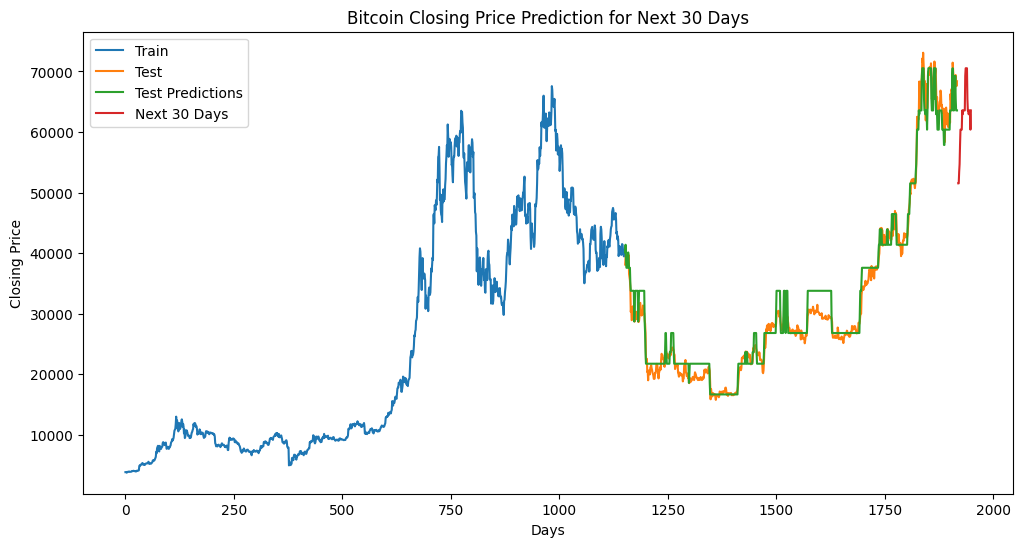

Predicted closing prices for the next 30 days:
[51521.97573793 51521.97573793 53422.10367168 54688.85562752
 57855.73551711 60389.23942879 60389.23942879 60389.23942879
 60389.23942879 63556.11931838 62922.74334046 63556.11931838
 63556.11931838 63556.11931838 63556.11931838 63556.11931838
 69256.50311965 70523.25507549 70523.25507549 70523.25507549
 70523.25507549 65456.24725214 63556.11931838 63556.11931838
 62922.74334046 63556.11931838 63556.11931838 62922.74334046
 60389.23942879 63556.11931838]


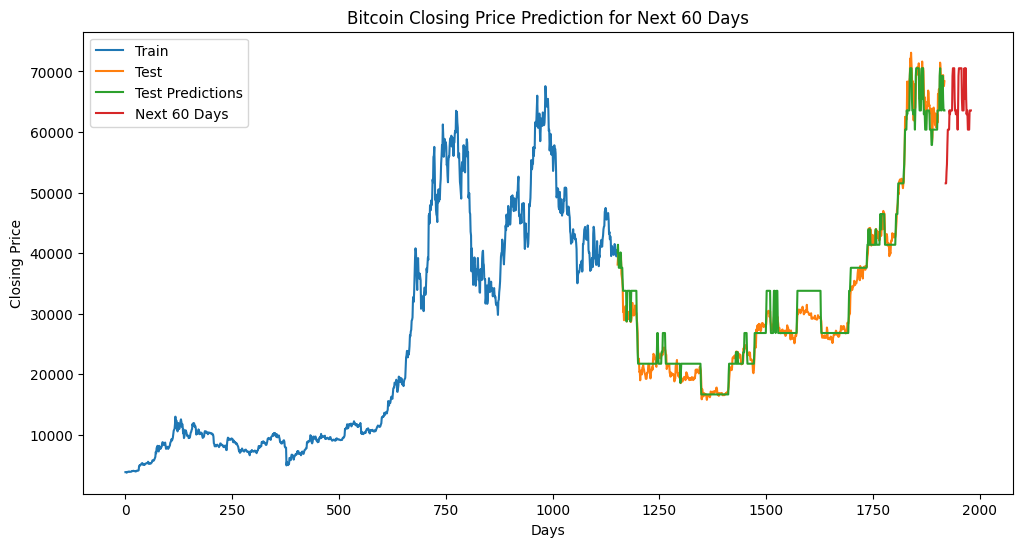

Predicted closing prices for the next 60 days:
[51521.97573793 51521.97573793 53422.10367168 54688.85562752
 57855.73551711 60389.23942879 60389.23942879 60389.23942879
 60389.23942879 63556.11931838 62922.74334046 63556.11931838
 63556.11931838 63556.11931838 63556.11931838 63556.11931838
 69256.50311965 70523.25507549 70523.25507549 70523.25507549
 70523.25507549 65456.24725214 63556.11931838 63556.11931838
 62922.74334046 63556.11931838 63556.11931838 62922.74334046
 60389.23942879 63556.11931838 69256.50311965 70523.25507549
 70523.25507549 70523.25507549 70523.25507549 70523.25507549
 70523.25507549 70523.25507549 65456.24725214 63556.11931838
 63556.11931838 63556.11931838 63556.11931838 69256.50311965
 70523.25507549 65456.24725214 69256.50311965 70523.25507549
 65456.24725214 62922.74334046 63556.11931838 62922.74334046
 60389.23942879 60389.23942879 60389.23942879 60389.23942879
 63556.11931838 63556.11931838 63556.11931838 63556.11931838]


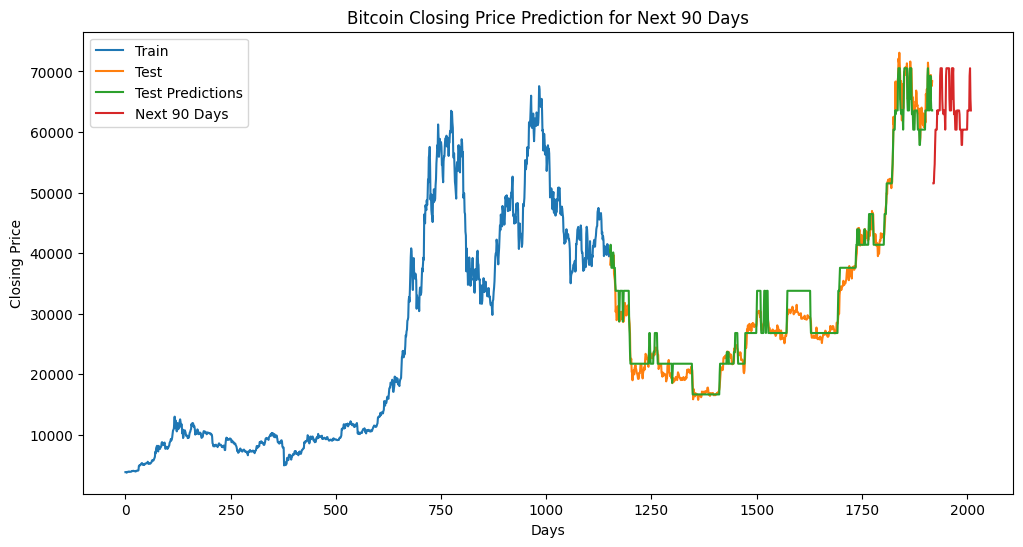

Predicted closing prices for the next 90 days:
[51521.97573793 51521.97573793 53422.10367168 54688.85562752
 57855.73551711 60389.23942879 60389.23942879 60389.23942879
 60389.23942879 63556.11931838 62922.74334046 63556.11931838
 63556.11931838 63556.11931838 63556.11931838 63556.11931838
 69256.50311965 70523.25507549 70523.25507549 70523.25507549
 70523.25507549 65456.24725214 63556.11931838 63556.11931838
 62922.74334046 63556.11931838 63556.11931838 62922.74334046
 60389.23942879 63556.11931838 69256.50311965 70523.25507549
 70523.25507549 70523.25507549 70523.25507549 70523.25507549
 70523.25507549 70523.25507549 65456.24725214 63556.11931838
 63556.11931838 63556.11931838 63556.11931838 69256.50311965
 70523.25507549 65456.24725214 69256.50311965 70523.25507549
 65456.24725214 62922.74334046 63556.11931838 62922.74334046
 60389.23942879 60389.23942879 60389.23942879 60389.23942879
 63556.11931838 63556.11931838 63556.11931838 63556.11931838
 63556.11931838 63556.11931838 62922.7

In [58]:
# 10. Dự đoán 30, 60, 90 ngày tiếp theo
def predict_future(model, data, time_step, days):
    temp_input = list(data[-time_step:])
    lst_output = []

    for _ in range(days):
        x_input = np.array(temp_input[-time_step:])  # Lấy 100 dữ liệu lịch sử
        yhat = model.predict(x_input)[0]  # Dự đoán dữ liệu tiếp theo
        temp_input.append(yhat)
        lst_output.append(yhat)

    return np.array(lst_output)

last_100_days = df1[-100:]
future_days = [30, 60, 90]
for days in future_days:
    future_predictions = predict_future(model, last_100_days, 100, days)

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(train_data)), train_data, label='Train')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Test')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), y_pred_test, label='Test Predictions')
    future_index = range(len(df1), len(df1) + days)
    plt.plot(future_index, future_predictions, label=f'Next {days} Days')

    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(future_predictions.flatten())